# SGD( Schotastic Gradient Descent) Model

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## Importing and Cleaning Data

In [3]:
data = pd.read_csv("data.csv")
# data.dtypes
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
data["horsepower"].fillna(data['horsepower'].mean(), inplace=True)
data['horsepower'].nunique()
data

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86.0,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52.0,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84.0,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79.0,2625,18.6,1982,ford ranger,11.904024


### EDA - Exploratory Data Analysis

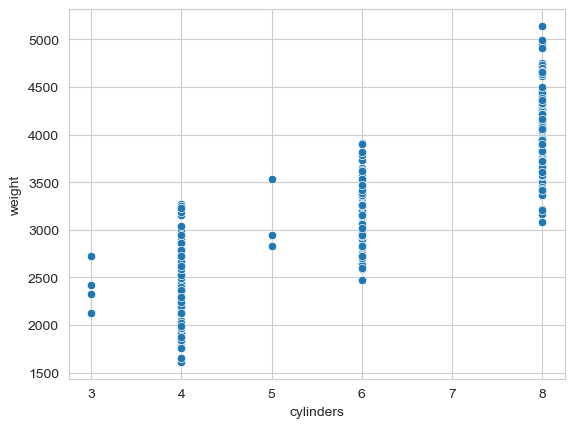

In [36]:
sns.scatterplot(data, x='cylinders', y='weight')
plt.show()

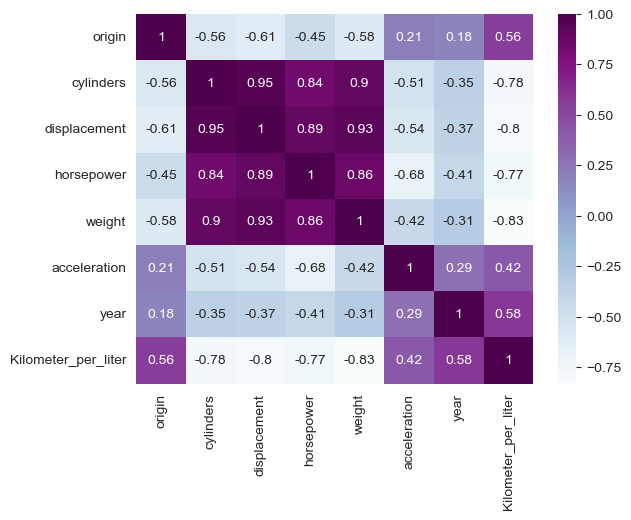

In [34]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='BuPu')
plt.show()

In [5]:
x = data.iloc[:,1:-2].values
y = data.iloc[:,-1].values

## Splitting the dataset into the Training set and Test Set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Encoding Columns

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer([('scaler', StandardScaler(), [0,1, 2, 3, 4, 5])], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

## Training the Model

In [71]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(max_iter=10000, alpha=0.01)
regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.01, max_iter=10000)

## Predicting the test set results

In [72]:
y_pred = regressor.predict(x_test)

## Evaluating the Model Performance

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared: {}%'.format(round((r2_score(y_test, y_pred)*100),2)))

Mean Absolute Error: 1.1795317915271062
Mean Squared Error: 2.1787790643314486
R-squared: 81.0%
